# Credit Card Fraud Detection

### Introduction:

In today's digital age, credit card transactions have become an integral part of our daily lives. With the convenience of online shopping and the increasing popularity of e-commerce platforms, the use of credit cards has skyrocketed. However, along with this surge in usage comes the looming threat of credit card fraud. As technology advances, so do the methods employed by fraudsters to exploit unsuspecting cardholders and financial institutions.

Credit card fraud refers to the unauthorized use of someone else's credit card information to make purchases or conduct fraudulent activities. It poses significant risks not only to individuals but also to businesses, financial institutions, and the economy as a whole. The need to detect and prevent credit card fraud has never been more critical.

The Need for Credit Card Fraud Detection:

**Protecting Consumers:** Credit card fraud can have severe consequences for individuals. Victims may face financial losses, damaged credit scores, and the burden of proving their innocence. Implementing robust fraud detection systems helps protect consumers from falling victim to fraudulent activities, offering peace of mind and ensuring their trust in the financial system.

**Safeguarding Financial Institutions:** Fraudulent transactions can result in substantial losses for banks, credit card companies, and other financial institutions. By investing in effective fraud detection systems, these institutions can minimize financial risks and protect their assets, reputation, and overall stability.

**Preserving the Economy:** Credit card fraud not only affects individuals and financial institutions but also has wider economic implications. When fraudulent activities go undetected, they can lead to increased costs for businesses, which are often passed on to consumers. Moreover, fraud can erode trust in online transactions, hampering e-commerce growth and hindering economic development.

**Staying Ahead of Sophisticated Fraudsters:** Fraudsters continuously adapt and develop new techniques to exploit vulnerabilities in payment systems. Traditional rule-based systems are no longer sufficient to keep up with the evolving nature of fraud. Advanced analytics and machine learning algorithms offer the ability to analyze vast amounts of data and detect subtle patterns that may indicate fraudulent behavior, allowing institutions to stay one step ahead of fraudsters.

**Compliance with Regulatory Standards:** Financial institutions are subject to various regulations and compliance requirements aimed at safeguarding customer data and preventing financial crimes. Implementing effective fraud detection systems helps institutions meet these regulatory obligations, avoiding penalties and legal consequences.

### Aim:
Detect potential fraud cases so that the customers are ensured that they won’t be charged for the items they did not purchase.

In [1]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORTING DATA

df = pd.read_csv('C:\\Users\Administrator\Downloads\Datasets\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('CASE COUNT')
print('-'*40)
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of Non-fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))
print('-'*40)

CASE COUNT
----------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
----------------------------------------


We can see that out of 284,807 samples, there are only 492 fraud cases which is only 0.17 percent of the total samples. So, we can say that the data we are dealing with is highly imbalanced data and needs to be handled carefully when modeling and evaluating.

In [4]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print('CASE AMOUNT STATISTICS')
print('-'*40)
print('NON-FRAUD CASE AMOUNT STATS')
print(nonfraud_cases.Amount.describe())
print('-'*40)
print('FRAUD CASE AMOUNT STATS')
print(fraud_cases.Amount.describe())
print('-'*40)

CASE AMOUNT STATISTICS
----------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
----------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
----------------------------------------


While seeing the statistics, it is seen that the values in the ‘Amount’ variable are varying enormously when compared to the rest of the variables. To reduce its wide range of values, we can normalize it using the ‘StandardScaler’ method in python.

In [5]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(df['Amount'].head(10))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [6]:
# DATA SPLIT

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X_train samples : ', X_train[:1])
print('X_test samples : ', X_test[0:1])
print('y_train samples : ', y_train[0:20])
print('y_test samples : ', y_test[0:20])

X_train samples :  [[ 5.31500000e+04 -1.11504743e+00  1.03558276e+00  8.00712441e-01
  -1.06039825e+00  3.26211690e-02  8.53422160e-01 -6.14243480e-01
  -3.23116112e+00  1.53994798e+00 -8.16908791e-01 -1.30559201e+00
   1.08177199e-01 -8.59609580e-01 -7.19342108e-02  9.06655628e-01
  -1.72092961e+00  7.97853221e-01 -6.75939779e-03  1.95677806e+00
  -6.44895565e-01  3.02038533e+00 -5.39617976e-01  3.31564886e-02
  -7.74945766e-01  1.05867812e-01 -4.30853482e-01  2.29736936e-01
  -7.05913036e-02 -3.01454177e-01]]
X_test samples :  [[ 1.25821000e+05 -3.23333572e-01  1.05745525e+00 -4.83411518e-02
  -6.07204308e-01  1.25982115e+00 -9.17607168e-02  1.15910150e+00
  -1.24334606e-01 -1.74639536e-01 -1.64440065e+00 -1.11886302e+00
   2.02647310e-01  1.14596495e+00 -1.80235956e+00 -2.47177932e-01
  -6.09453515e-02  8.46605738e-01  3.79454387e-01  8.47262245e-01
   1.86409421e-01 -2.07098267e-01 -4.33890272e-01 -2.61613283e-01
  -4.66506063e-02  2.11512300e-01  8.29721214e-03  1.08494430e-01
   

In [7]:
# MODELING

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

In [12]:
# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

In [8]:
# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [10]:
# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [11]:
# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [9]:
# 6. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In the above code, we have built six different types of classification models starting from the Decision tree model to the XGBoost model. Now let’s breakdown the code.

Starting with the decision tree, we have used the ‘DecisionTreeClassifier’ algorithm to build the model. Inside the algorithm, we have mentioned the ‘max_depth’ to be ‘4’ which means we are allowing the tree to split four times and the ‘criterion’ to be ‘entropy’ which is most similar to the ‘max_depth’ but determines when to stop splitting the tree. Finally, we have fitted and stored the predicted values into the ‘tree_yhat’ variable.

Next is the K-Nearest Neighbors (KNN). We have built the model using the ‘KNeighborsClassifier’ algorithm and mentioned the ‘n_neighbors’ to be ‘5’. The value of the ‘n_neighbors’ is randomly selected but can be chosen optimistically through iterating a range of values, followed by fitting and storing the predicted values into the ‘knn_yhat’ variable.

There is nothing much to explain about the code for Logistic regression as we kept the model in a way more simplistic manner by using the ‘LogisticRegression’ algorithm and as usual, fitted and stored the predicted variables in the ‘lr_yhat’ variable.

We built the Support Vector Machine model using the ‘SVC’ algorithm and we didn’t mention anything inside the algorithm as we managed to use the default kernel which is the ‘rbf’ kernel. After that, we stored the predicted values into the ‘svm_yhat’ after fitting the model.

The next model is the Random forest model which we built using the ‘RandomForestClassifier’ algorithm and we mentioned the ‘max_depth’ to be 4 just like how we did to build the decision tree model. Finally, fitting and storing the values into the ‘rf_yhat’. Remember that the main difference between the decision tree and the random forest is that, decision tree uses the entire dataset to construct a single model whereas, the random forest uses randomly selected features to construct multiple models. That’s the reason why the random forest model is used versus a decision tree.

Our final model is the XGBoost model. We built the model using the ‘XGBClassifier’ algorithm provided by the xgboost package. We mentioned the ‘max_depth’ to be 4 and finally, fitted and stored the predicted values into the ‘xgb_yhat’.

With that, we have successfully built our six types of classification models and interpreted the code for easy understanding. Our next step is to evaluate each of the models and find which is the most suitable one for our case.

Evaluation
As I said before, in this process we are going to evaluate our built models using the evaluation metrics provided by the scikit-learn package. Our main objective in this process is to find the best model for our given case. The evaluation metrics we are going to use are the accuracy score metric, f1 score metric, and finally the confusion matrix.

1. Accuracy score
Accuracy score is one of the most basic evaluation metrics which is widely used to evaluate classification models. The accuracy score is calculated simply by dividing the number of correct predictions made by the model by the total number of predictions made by the model (can be multiplied by 100 to transform the result into a percentage). It can generally be expressed as:

Accuracy score = No.of correct predictions / Total no.of predictions

Let’s check the accuracy score of the six different classification models we built. We can use the ‘accuracy_score’ method provided by the scikit-learn package.

In [14]:
# 1. Accuracy score

print('ACCURACY SCORE')
print('-'*60)
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))
print('-'*60)
print('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('-'*60)
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('-'*60)
print('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)))
print('-'*60)
print('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)))
print('-'*60)
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
print('-'*60)

ACCURACY SCORE
------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------
Accuracy score of the KNN model is 0.9983848881710614
------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9990168884519505
------------------------------------------------------------
Accuracy score of the SVM model is 0.9982268881008391
------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9992802219023208
------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9995084442259752
------------------------------------------------------------


According to the accuracy score evaluation metric, the XGBoost model reveals to be the most accurate model and the SVM model to be the least accurate model. However, when we round up the results of each model, it shows 0.99 (99% accurate) which is a very good score.

2. F1 Score
The F1 score or F-score is one of the most popular evaluation metrics used for evaluating classification models. It can be simply defined as the harmonic mean of the model’s precision and recall. It is calculated by dividing the product of the model’s precision and recall by the value obtained on adding the model’s precision and recall and finally multiplying the result with 2. It can be expressed as:

F1 score = 2( (precision * recall) / (precision + recall) )

The F1 score can be calculated easily in python using the ‘f1_score’ method provided by the scikit-learn package.

In [15]:
# 2. F1 score

print('F1 SCORE')
print('-'*60)
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
print('-'*60)
print('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)))
print('-'*60)
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))
print('-'*60)
print('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)))
print('-'*60)
print('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)))
print('-'*60)
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))
print('-'*60)

F1 SCORE
------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------
F1 score of the KNN model is 0.1636363636363636
------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7333333333333334
------------------------------------------------------------
F1 score of the SVM model is 0.0
------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.768361581920904
------------------------------------------------------------
F1 score of the XGBoost model is 0.851063829787234
------------------------------------------------------------


The ranking of the models is almost similar to the previous evaluation metric. On basis of the F1 score evaluation metric, the XGBoost model snatches the first place again and the SVM model remains to be the least accurate model.

3. Confusion Matrix
Typically, a confusion matrix is a visualization of a classification model that shows how well the model has predicted the outcomes when compared to the original ones. Usually, the predicted outcomes are stored in a variable that is then converted into a correlation table. Using the correlation table, the confusion matrix is plotted in the form of a heatmap. Even though there are several built-in methods to visualize a confusion matrix, we are going to define and visualize it from scratch for better understanding. Let’s do it in python!

In [40]:
# Defining the plot function
def plot_confusion_matrix(ax, cm, classes, title, normalize=False, cmap=plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [41]:
# Compute confusion matrix for the models
tree_matrix = confusion_matrix(y_test, tree_yhat, labels=[0, 1])  # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels=[0, 1])  # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels=[0, 1])  # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels=[0, 1])  # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels=[0, 1])  # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels=[0, 1])  # XGBoost


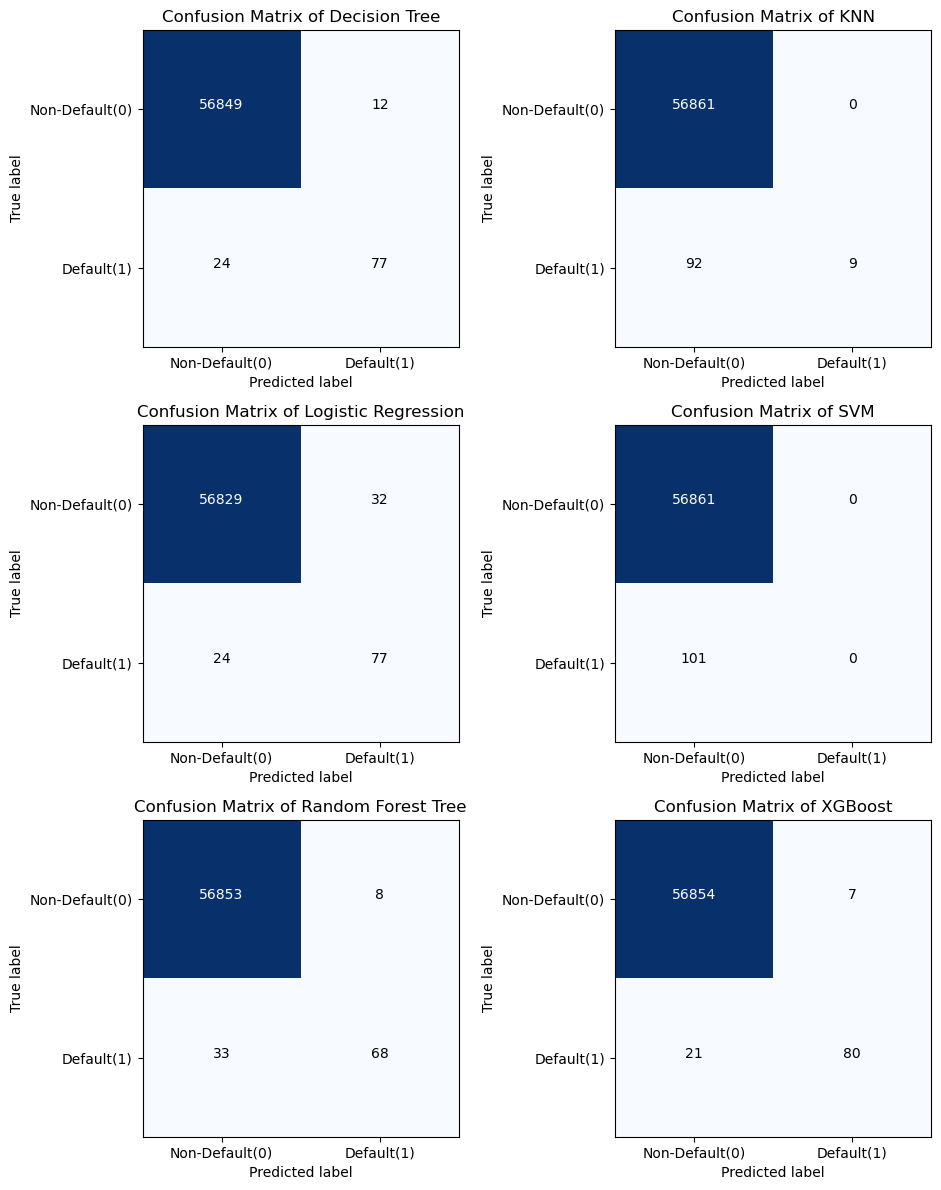

In [42]:
# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Plot the confusion matrices on subplots
confusion_matrices = [tree_matrix, knn_matrix, lr_matrix, svm_matrix, rf_matrix, xgb_matrix]
class_names = ['Non-Default(0)', 'Default(1)']
titles = ['Decision Tree', 'KNN', 'Logistic Regression', 'SVM', 'Random Forest Tree', 'XGBoost']

for ax, cm, title in zip(axes.flatten(), confusion_matrices, titles):
    plot_confusion_matrix(ax, cm, classes=class_names, normalize=False, title=title)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Understanding the confusion matrix: Let’s take the confusion matrix of the XGBoost model as an example. Look at the first row. The first row is for transactions whose actual fraud value in the test set is 0. As you can calculate, the fraud value of 56861 of them is 0. And out of these 56861 non-fraud transactions, the classifier correctly predicted 56854 of them as 0 and 7 of them as 1. It means, for 56854 non-fraud transactions, the actual churn value was 0 in the test set, and the classifier also correctly predicted those as 0. We can say that our model has classified the non-fraud transactions pretty well.

Let’s look at the second row. It looks like there were 101 transactions whose fraud value was 1. The classifier correctly predicted 80 of them as 1, and 21 of them wrongly as 0. The wrongly predicted values can be considered as the error of the model.

Like this, while comparing the confusion matrix of all the models, it can be seen that the K-Nearest Neighbors model has performed a very good job of classifying the fraud transactions from the non-fraud transactions followed by the XGBoost model. So we can conclude that the most appropriate model which can be used for our case is the K-Nearest Neighbors model and the model which can be neglected is the Logistic regression model.

### Conclusion: 

Credit card fraud detection analysis is an essential component of the modern financial landscape. By leveraging advanced technologies and analytical tools, institutions can proactively identify and prevent fraudulent activities, protecting consumers, preserving the economy, and ensuring the stability of the financial ecosystem. As the threat of credit card fraud continues to evolve, staying vigilant and investing in robust fraud detection measures is crucial for safeguarding the interests of individuals, businesses, and society as a whole.

### THANK YOU